In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
data = pd.read_csv("spam.csv", encoding="latin-1")

In [127]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [128]:
data.tail(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [129]:
data.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [130]:
data =  data.drop(data.columns[[2,3,4]],axis = 1)

In [131]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<function matplotlib.pyplot.show(close=None, block=None)>

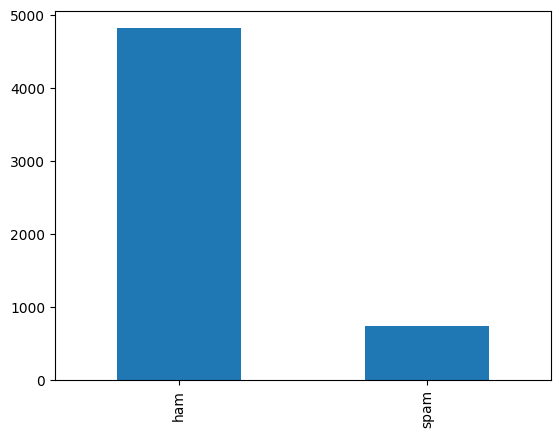

In [132]:
data['v1'].value_counts().plot(kind='bar')
plt.show

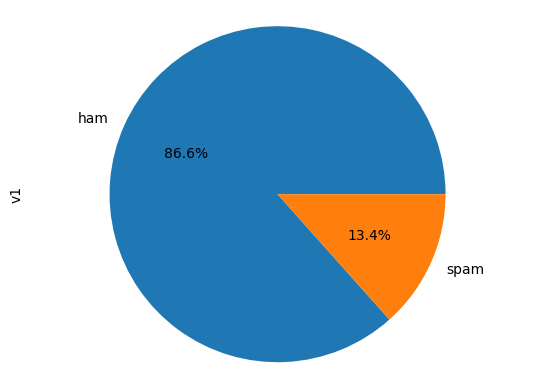

In [133]:
data['v1'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [134]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [135]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)


In [136]:
data['v2'] = data['v2'].map(lambda s:preprocess(s))

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [138]:
x=vect.fit_transform(data['v2'])

In [139]:
x

<5572x7386 sparse matrix of type '<class 'numpy.float64'>'
	with 41640 stored elements in Compressed Sparse Row format>

In [140]:
le=LabelEncoder()

In [141]:
y=le.fit_transform(data['v1'])

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
data['after_transformation'] = data['v2']

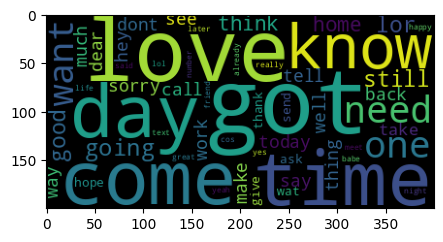

In [144]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(data[data['v1']=='ham']['after_transformation'].str.cat(sep=" "))
plt.figure(figsize=(5, 5))
plt.imshow(spam_wc)
plt.show()

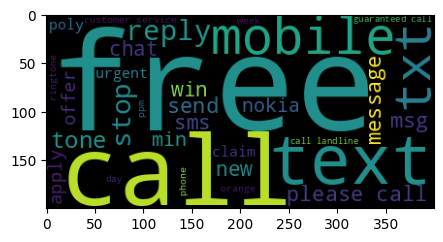

In [145]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(data[data['v1']=='spam']['after_transformation'].str.cat(sep=" "))
plt.figure(figsize=(5, 5))
plt.imshow(spam_wc)
plt.show()

In [146]:
data.duplicated().sum()

561

In [147]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [148]:
pd.DataFrame(y).value_counts()

0    4825
1     747
dtype: int64

In [149]:
from imblearn.combine import SMOTETomek

smt=SMOTETomek()
x_new,y_new=smt.fit_resample(x,y)

In [150]:
pd.DataFrame(y_new).value_counts()

0    4825
1    4825
dtype: int64

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=0.2,random_state=142)

In [152]:
print(xtrain.shape)
print(xtest.shape)

(7720, 7386)
(1930, 7386)


In [153]:
print(ytrain.shape)
print(ytest.shape)

(7720,)
(1930,)


In [154]:
random_grid={'criterion':['entropy'],
            'max_depth':[110],
            'max_features': ['auto'],
            'min_samples_leaf': [2],
            'min_samples_split': [5],
            'n_estimators': [180]}

In [155]:
rf = RandomForestClassifier(criterion='entropy',max_depth=110,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=180)



In [156]:
rf.fit(xtrain,ytrain)
rf_pred_train=rf.predict(xtrain)
rf_pred_test=rf.predict(xtest)

In [157]:
print('Train accuracy score of the model is: ', round(accuracy_score(ytrain, rf_pred_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(ytest, rf_pred_test),2))

Train accuracy score of the model is:  1.0
Test accuracy score of the model is:  0.99


In [158]:



mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
nb_preds_train = mnb.predict(xtrain)
nb_preds_test = mnb.predict(xtest)
print('Train accuracy score of the model is: ', round(accuracy_score(ytrain, nb_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(ytest, nb_preds_test),2))

Train accuracy score of the model is:  0.98
Test accuracy score of the model is:  0.98


In [159]:
from transformers import pipeline


In [160]:
from transformers import pipeline

pipe = pipeline("text-classification", model="skandavivek2/spam-classifier")

In [161]:
p = pipe(str(data['v2'][2]))

In [162]:
print(p)

[{'label': 'SPAM', 'score': 0.9995269775390625}]


In [163]:
import gradio as gr

In [164]:
def transform(input_text):
        transformed_input = preprocess(input_text)
        vectorizedd = vect.transform([transformed_input])
        result = rf.predict_proba(vectorizedd)[0]
        return {"ham" : float(result[0]), "spam" : float(result[1])}


demo = gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),
    outputs='label',
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>